In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("labeled_golf_data.csv")
df.head()

,Unnamed: 0,AGE,ATTEMPTS_GFG,AVG_Driving_DISTANCE,AVG_SCORE,FAIRWAY_HIT_%,GIR_RANK,MISSED_GIR,NUMBER_OF_TOP_Tens,NUMBER_OF_WINS,...,POINTS,ROUGH_TENDNECY%,SAND_SAVE%,SG:APR,SG:ARG,SG:OTT,TOTAL_3_PUTTS,TOTAL_SG:PUTTING,UP_AND_DOWN_%,labels
0,0,37.0,139.0,295.5,70.850,52.18,165.0,488.0,1.0,0.0,...,342.0,35.86,56.25,0.048,0.632,-0.375,35.0,-4.064,62.09,3
1,1,22.0,157.0,303.4,70.276,63.29,45.0,440.0,4.0,1.0,...,1498.0,24.34,48.80,0.075,-0.010,0.421,52.0,17.134,56.59,4
2,2,27.0,179.0,296.3,70.659,63.06,108.0,563.0,5.0,0.0,...,909.0,28.68,54.38,0.128,-0.016,0.332,46.0,-4.076,63.23,3
3,3,30.0,146.0,289.7,70.750,65.18,74.0,481.0,3.0,0.0,...,1054.0,23.52,48.15,0.240,0.223,0.121,37.0,8.729,59.04,3
4,4,26.0,151.0,305.5,71.370,57.67,67.0,462.0,1.0,0.0,...,239.0,31.98,42.36,-0.262,-0.091,0.073,47.0,8.558,54.55,4


In [10]:
interest = """
            NUMBER_OF_WINS
            NUMBER_OF_TOP_Tens
            PAR_OR_BETTER
            AVG_Driving_DISTANCE
            GIR_RANK
            AGE
            TOTAL_3_PUTTS
            ATTEMPTS_GFG
            UP_AND_DOWN_%
            ROUGH_TENDNECY%
            SAND_SAVE%
            FAIRWAY_HIT_%
            TOTAL_SG:PUTTING
            SG:APR
            SG:ARG
            SG:OTT
            MISSED_GIR
            AVG_SCORE
            POINTS
            
            """.split()

interest.sort()

In [16]:
# Make a function to rename the clusters

def mapper(inp):
    dick = {
        1:"1. Top 20%",
        4:"2. Top 40%",
        3:"3. Avg",
        2:"4. Btm 40%",
        0:"5. Btm 20%"
    }
    lst = list(inp)
    out = []
    for i in lst:
        out.append(dick[i])
    return pd.Series(out)
        
S = mapper(df.labels)

In [17]:
df["group"] = S

In [18]:
df2 = df.sort_values(by="group").copy()
df2

,Unnamed: 0,AGE,ATTEMPTS_GFG,AVG_Driving_DISTANCE,AVG_SCORE,FAIRWAY_HIT_%,GIR_RANK,MISSED_GIR,NUMBER_OF_TOP_Tens,NUMBER_OF_WINS,...,ROUGH_TENDNECY%,SAND_SAVE%,SG:APR,SG:ARG,SG:OTT,TOTAL_3_PUTTS,TOTAL_SG:PUTTING,UP_AND_DOWN_%,labels,group
97,97,25.0,153.0,312.9,69.117,58.01,32.0,388.0,9.0,3.0,...,31.06,53.45,0.967,0.215,0.471,35.0,16.658,63.14,1,1. Top 20%
72,72,28.0,122.0,302.5,70.089,60.87,51.0,342.0,3.0,0.0,...,31.42,55.42,0.503,0.260,0.164,39.0,8.860,61.40,1,1. Top 20%
31,31,28.0,113.0,313.4,69.310,57.20,56.0,286.0,6.0,2.0,...,32.40,52.56,0.228,0.230,0.767,37.0,-0.183,64.69,1,1. Top 20%
32,32,24.0,175.0,306.4,69.624,61.23,26.0,441.0,9.0,3.0,...,26.47,48.09,0.654,0.151,0.579,56.0,21.533,61.68,1,1. Top 20%
175,175,42.0,95.0,303.5,69.457,57.39,89.0,342.0,5.0,0.0,...,30.12,47.78,0.955,0.367,-0.006,30.0,11.561,64.33,1,1. Top 20%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,48,27.0,124.0,301.0,72.112,55.45,177.0,439.0,0.0,0.0,...,33.29,48.72,-0.696,-0.111,-0.212,32.0,10.838,53.30,0,5. Btm 20%
41,41,34.0,95.0,299.5,71.349,54.86,183.0,387.0,3.0,0.0,...,32.36,48.87,-0.092,-0.038,-0.075,31.0,1.932,58.40,0,5. Btm 20%
159,159,34.0,62.0,293.2,72.182,64.97,186.0,326.0,1.0,1.0,...,26.74,40.24,-0.285,-0.924,0.026,44.0,-20.386,52.76,0,5. Btm 20%
168,168,25.0,75.0,297.1,74.891,40.85,195.0,416.0,1.0,0.0,...,42.64,42.86,-1.504,-0.497,-1.585,26.0,-15.532,47.12,0,5. Btm 20%


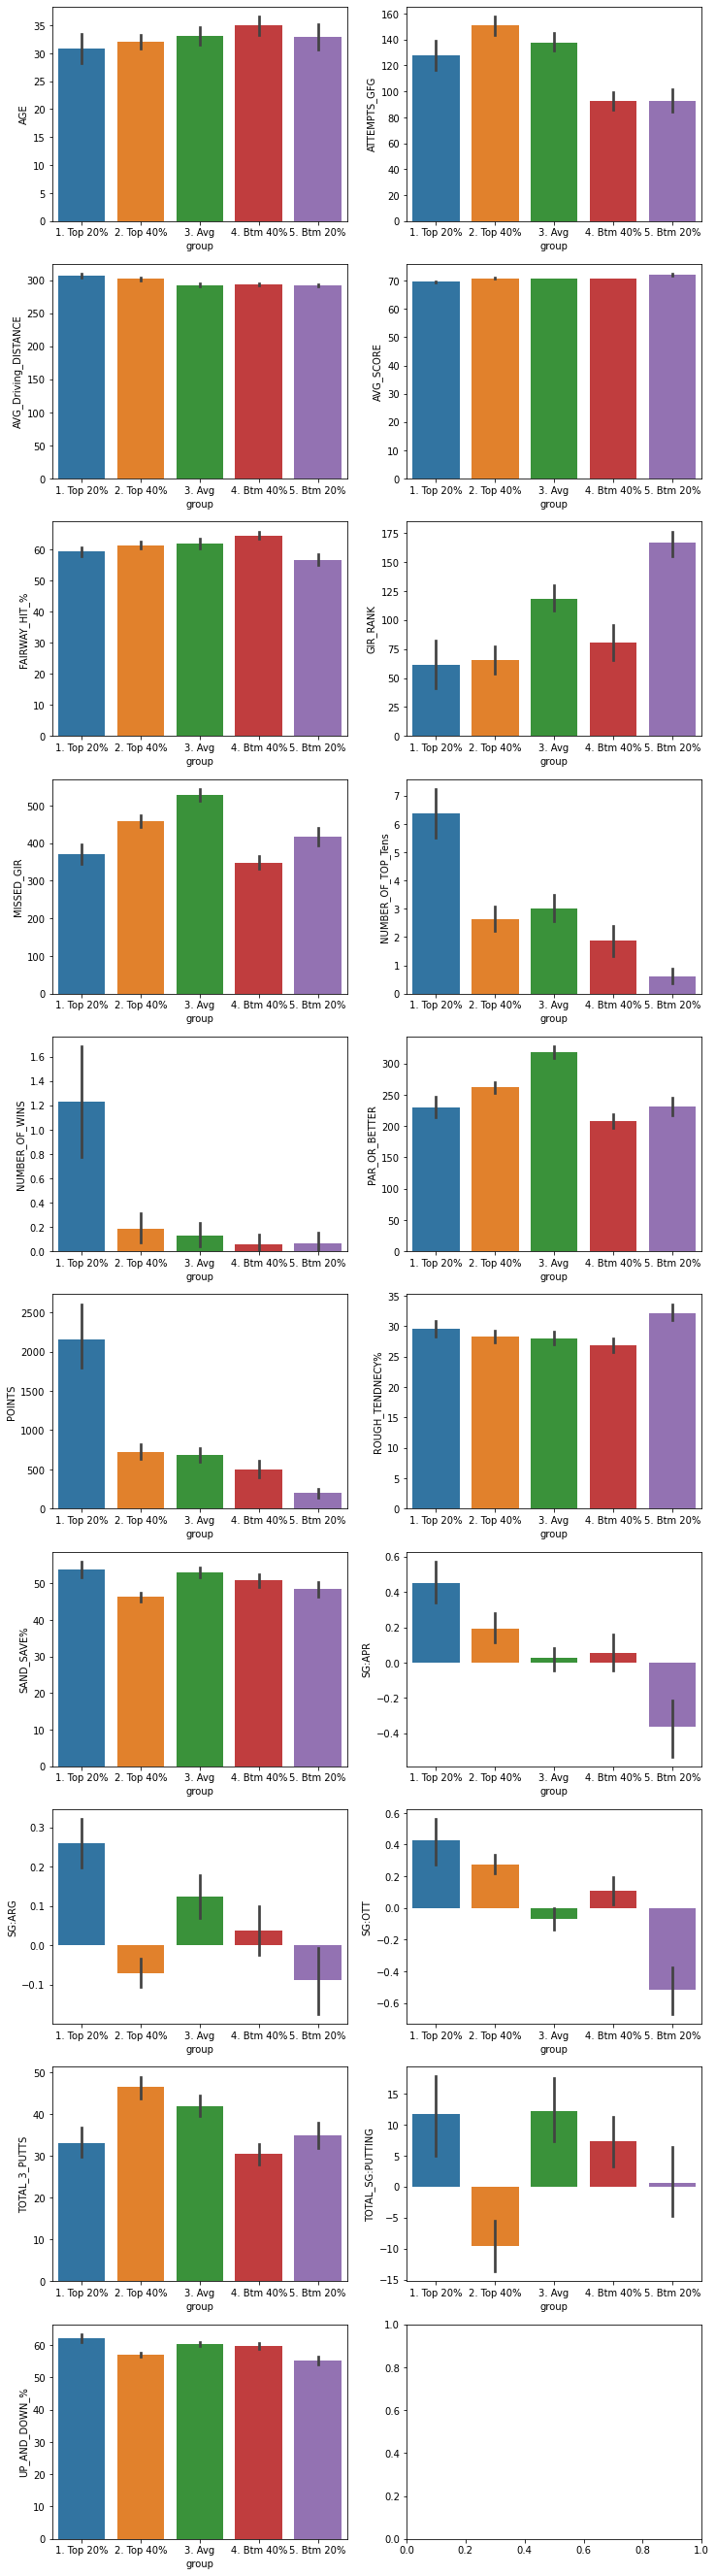

In [19]:
import math
rows = math.ceil(len(interest)/2)

fig, ax = plt.subplots(rows,2,figsize=(12,48))

for i, axis in zip(interest,ax.flat):
    sns.barplot(data = df2, x = "group", y = i, ax = axis)
    axis.set

In [21]:
import os
os.getcwd()

'C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 8\\Project'

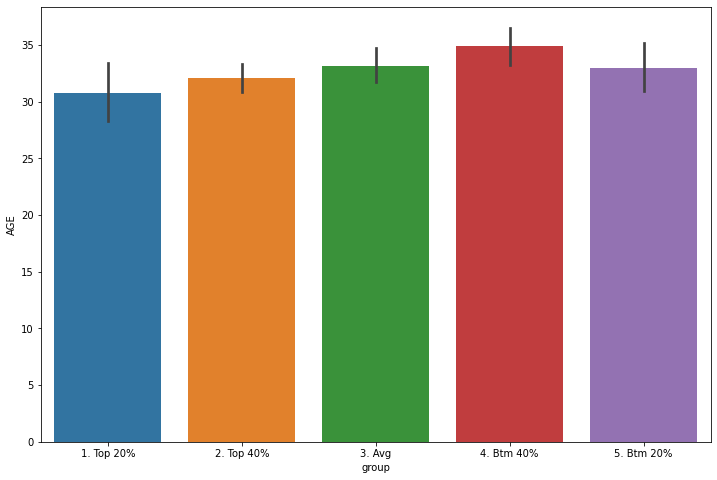

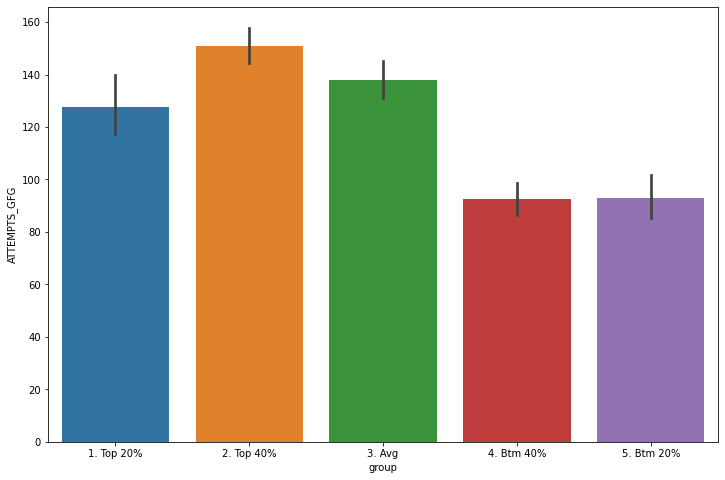

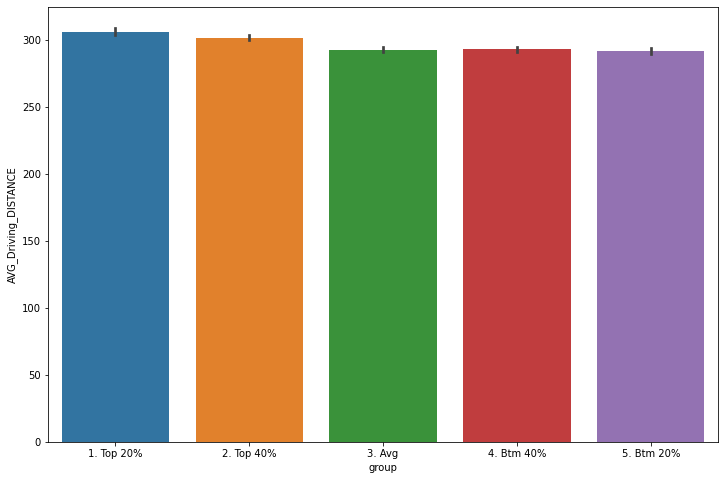

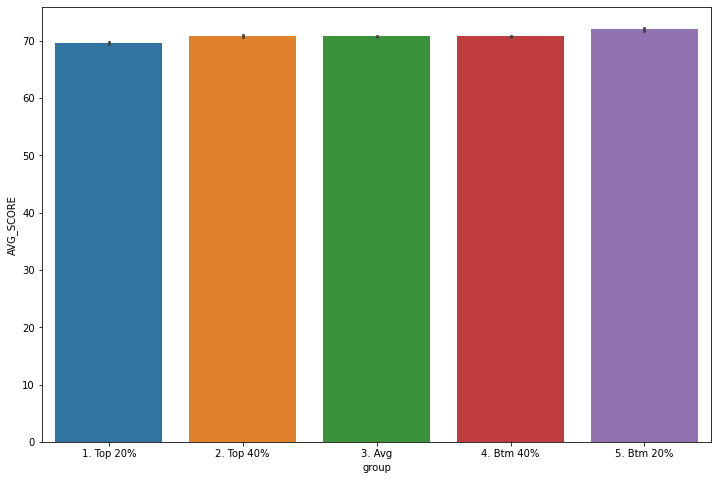

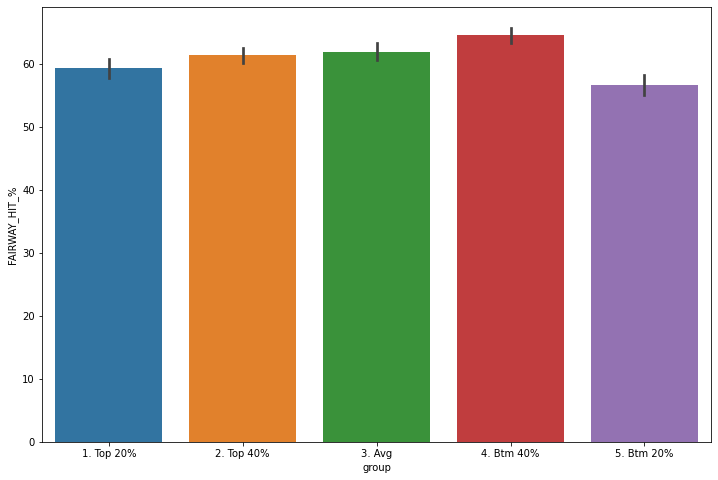

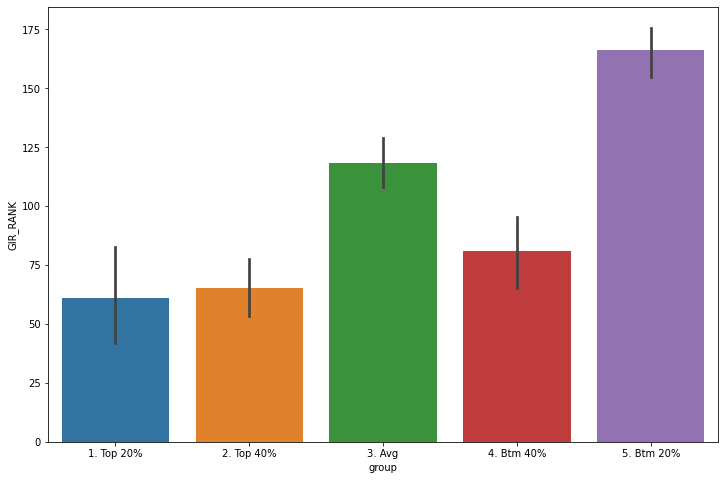

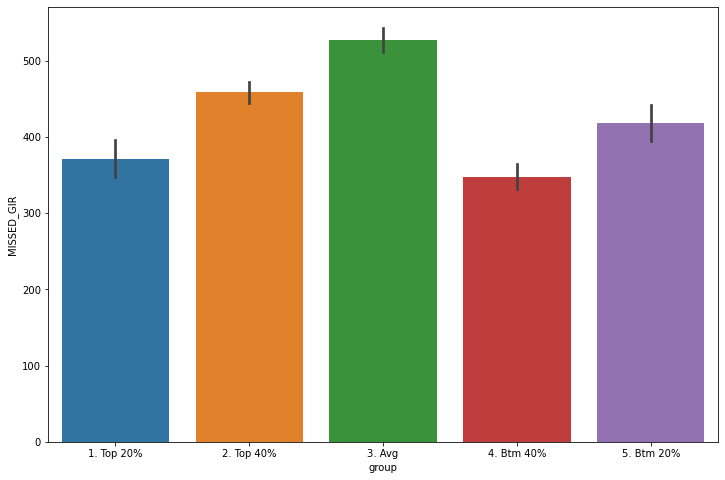

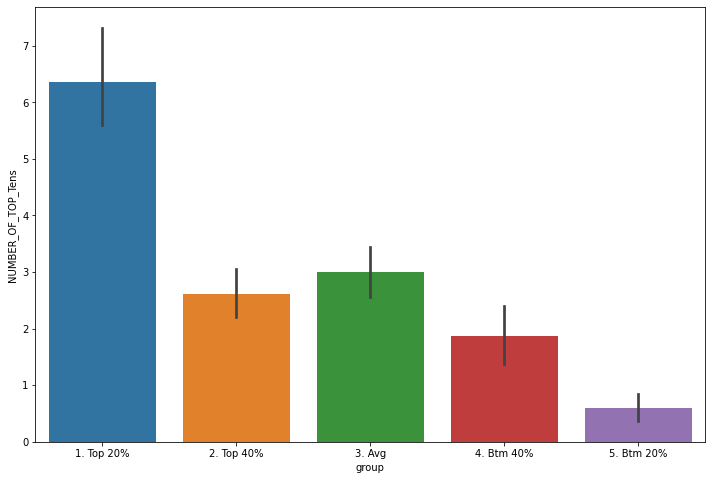

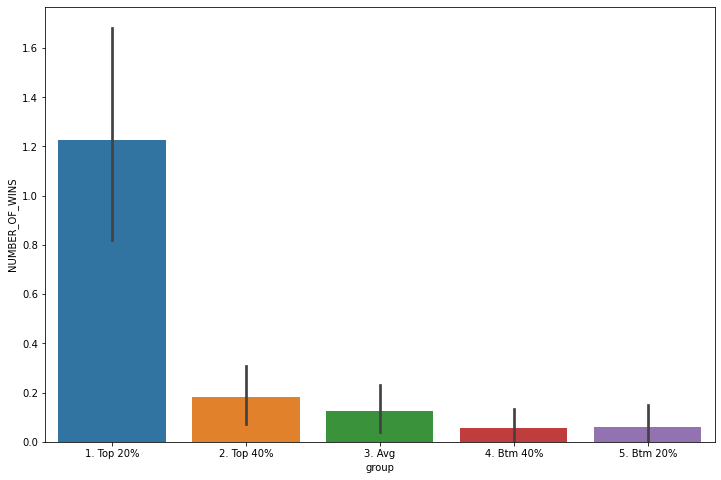

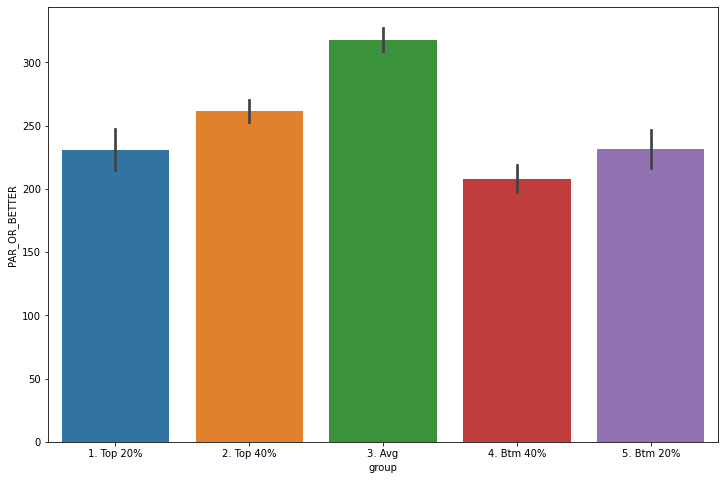

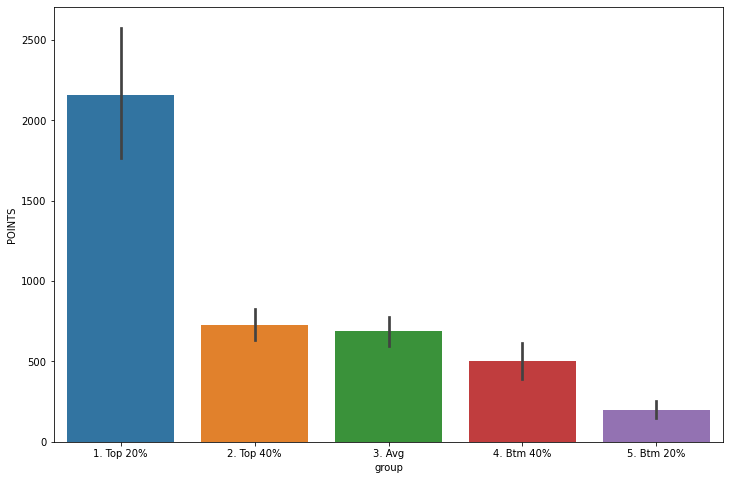

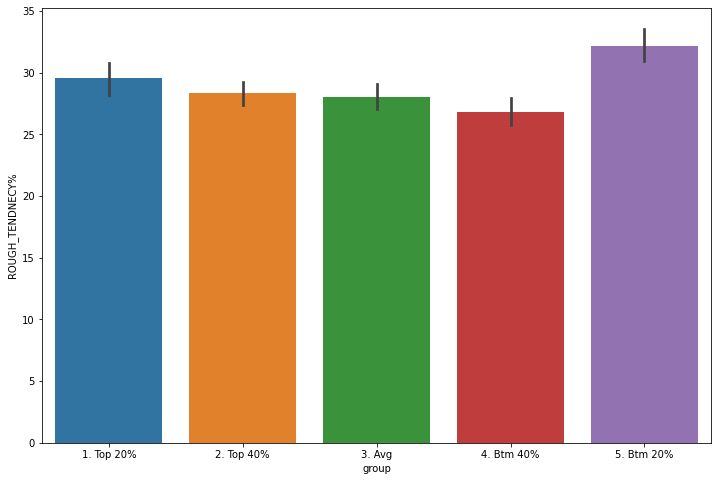

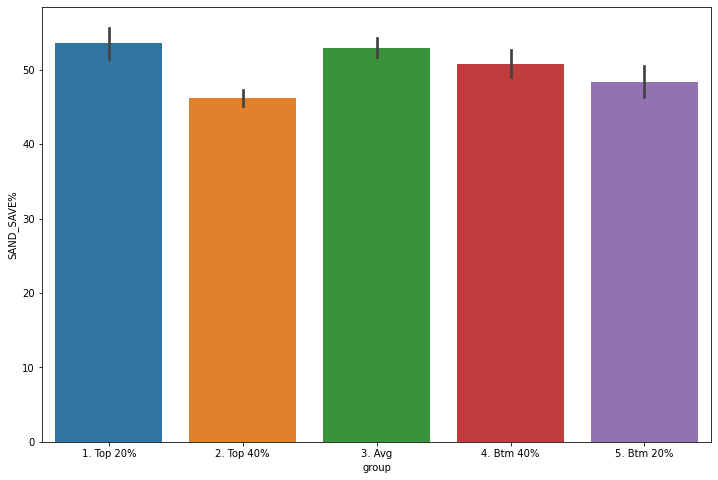

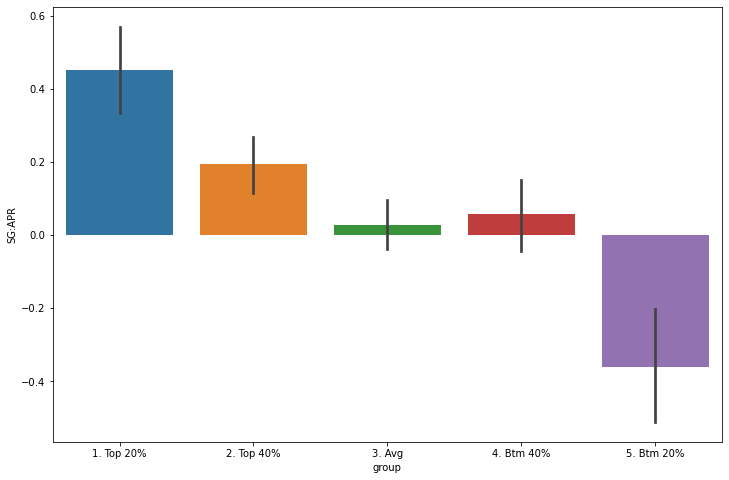

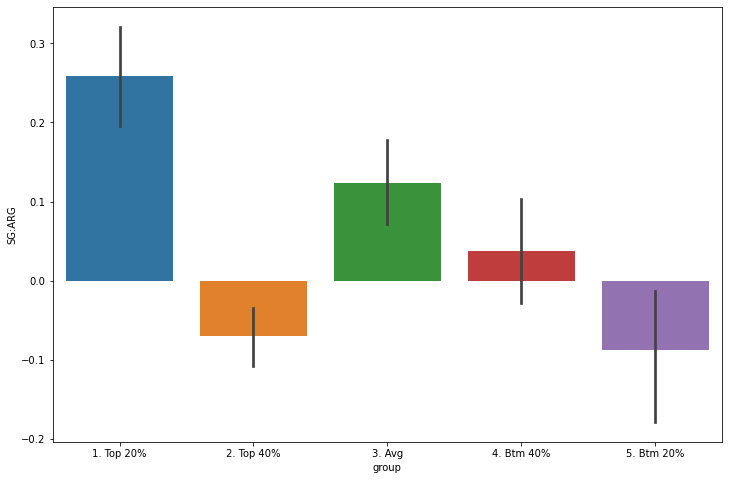

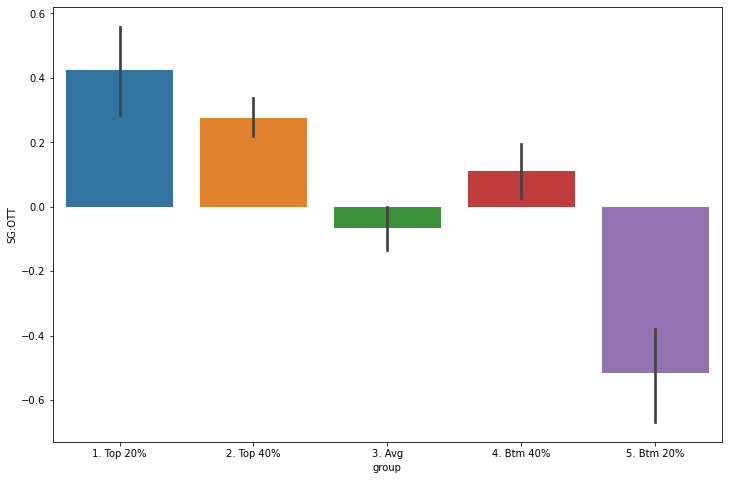

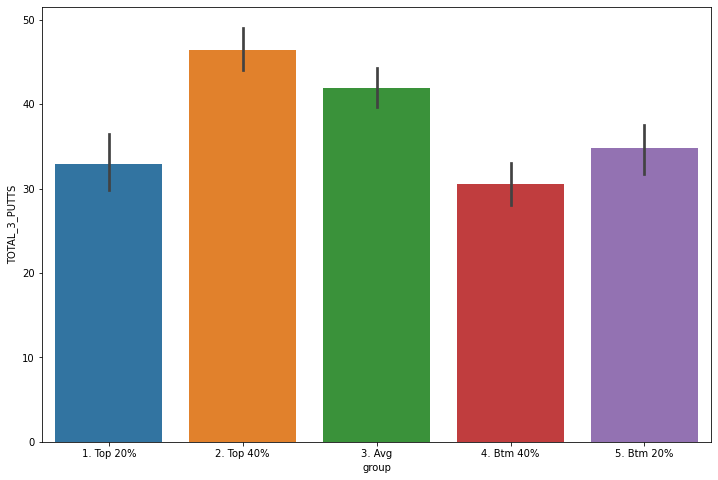

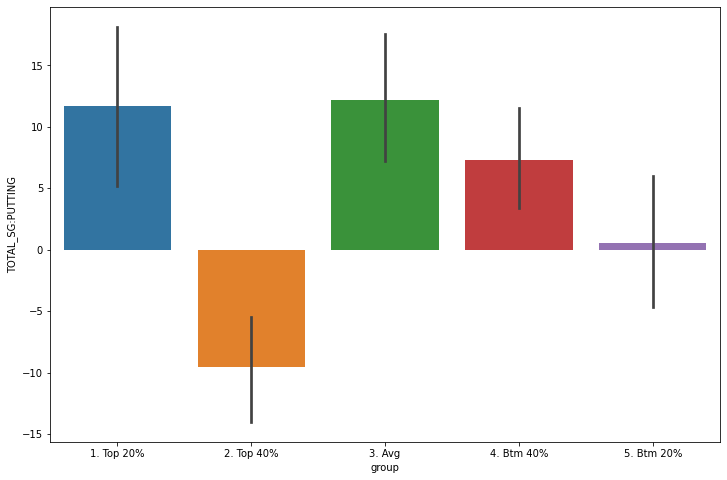

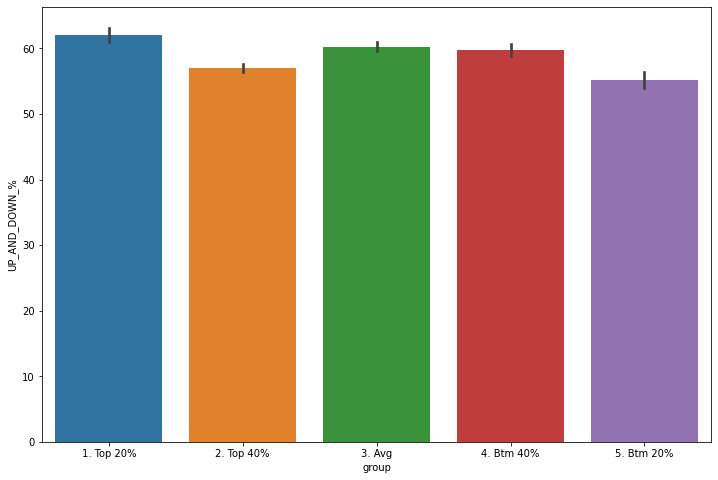

In [23]:
for i in range(0,len(interest)):
    plt.figure(figsize=(12,8))
    sns.barplot(data=df2, x="group", y=interest[i])
    plt.savefig(f'C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 8\\Project\\pics\\{interest[i]}.png')

In [24]:
len(interest)

19

In [26]:
for i in interest:
    print(i)

AGE
ATTEMPTS_GFG
AVG_Driving_DISTANCE
AVG_SCORE
FAIRWAY_HIT_%
GIR_RANK
MISSED_GIR
NUMBER_OF_TOP_Tens
NUMBER_OF_WINS
PAR_OR_BETTER
POINTS
ROUGH_TENDNECY%
SAND_SAVE%
SG:APR
SG:ARG
SG:OTT
TOTAL_3_PUTTS
TOTAL_SG:PUTTING
UP_AND_DOWN_%


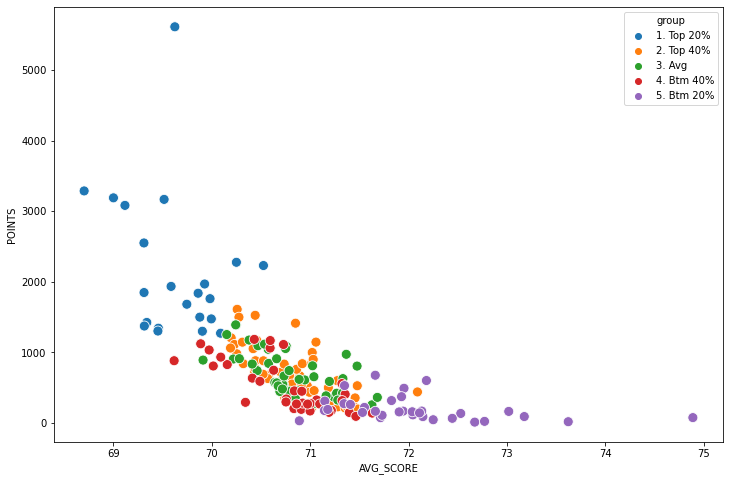

In [31]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df2, x="AVG_SCORE", y="POINTS", hue="group",s=100)
plt.savefig('C:\\Users\\victo\\00_Nod_coding_bootcamp\\Week 8\\Project\\pics\\groups')